In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('loans.csv')

In [3]:
df.head()

,grade,sub_grade,short_emp,emp_length_num,home_ownership,dti,purpose,term,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,safe_loans
0,C,C4,1,1,RENT,1.00,car,60 months,1,1,9.4,0.0,-1
1,F,F2,0,5,OWN,5.55,small_business,60 months,1,1,32.6,0.0,-1
2,B,B5,1,1,RENT,18.08,other,60 months,1,1,36.5,0.0,-1
3,C,C1,1,1,RENT,10.08,debt_consolidation,36 months,1,1,91.7,0.0,-1
4,B,B2,0,4,RENT,7.06,other,36 months,1,1,55.5,0.0,-1


* grade: 贷款级别
* sub_grade: 贷款细分级别
* short_emp: 一年以内短期雇佣
* emp_length_num:　受雇年限
* home_ownership:居住状态（自有，按揭，租住）
* dti：贷款占收入比例
* purpose:贷款用途
* term:贷款周期
* last_delinq_none:贷款申请人是否有不良记录　
* last_major_derog_none:贷款申请人是否有还款逾期90天以上记录
* reｖol_util：透支额度占信用比例
* total_rec_late_fee:逾期罚款总额
* safe_loans:贷款是否安全

In [4]:
df.shape

(46508, 13)

In [5]:
X = df.drop('safe_loans', axis=1)
y = df.safe_loans

In [6]:
X.shape

(46508, 12)

In [7]:
y.shape

(46508,)

In [8]:
X.head(10)

,grade,sub_grade,short_emp,emp_length_num,home_ownership,dti,purpose,term,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee
0,C,C4,1,1,RENT,1.00,car,60 months,1,1,9.4,0.00
1,F,F2,0,5,OWN,5.55,small_business,60 months,1,1,32.6,0.00
2,B,B5,1,1,RENT,18.08,other,60 months,1,1,36.5,0.00
3,C,C1,1,1,RENT,10.08,debt_consolidation,36 months,1,1,91.7,0.00
4,B,B2,0,4,RENT,7.06,other,36 months,1,1,55.5,0.00
5,B,B4,0,11,RENT,13.22,debt_consolidation,36 months,1,1,90.3,0.00
6,B,B3,0,2,RENT,2.40,major_purchase,36 months,1,1,29.7,0.00
7,C,C2,0,10,RENT,15.22,debt_consolidation,36 months,1,1,57.6,0.00
8,B,B1,0,9,MORTGAGE,9.12,debt_consolidation,36 months,1,1,63.7,24.17
9,C,C5,0,5,RENT,20.88,car,36 months,1,1,90.8,0.00


>python 最决策树的时候，每一个特征都应该是数值（整型或者实数）类型的。但是我们看到，grade,sub_grade,home_ownership等列的取值都是类别（categorical)型的。所以，必须经过一步转换，把这些类别都映射成为某个数值，才能进行下面的步骤。

In [9]:
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict

In [10]:
d = defaultdict(LabelEncoder)
X_trans = X.apply(lambda x : d[x.name].fit_transform(x))
X_trans.head()

,grade,sub_grade,short_emp,emp_length_num,home_ownership,dti,purpose,term,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee
0,2,13,1,1,3,97,0,1,1,1,107,0
1,5,26,0,5,2,552,9,1,1,1,349,0
2,1,9,1,1,3,1805,8,1,1,1,388,0
3,2,10,1,1,3,1005,2,0,1,1,952,0
4,1,6,0,4,3,703,8,0,1,1,583,0


In [11]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_trans, y, random_state=1)

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [12]:
X_train.shape

(34881, 12)

In [13]:
X_test.shape

(11627, 12)

In [14]:
from sklearn import tree

In [15]:
clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(X_train, y_train)

In [16]:
with open("safe-loans.dot", 'w') as f:
     f = tree.export_graphviz(clf,
                              out_file=f,
                              max_depth = 3,
                              impurity = True,
                              feature_names = list(X_train),
                              class_names = ['not safe', 'safe'],
                              rounded = True,
                              filled= True )

In [17]:
from subprocess import check_call

In [19]:
check_call(['dot','-Tpng','safe-loans.dot','-o','safe-loans.png'])

0

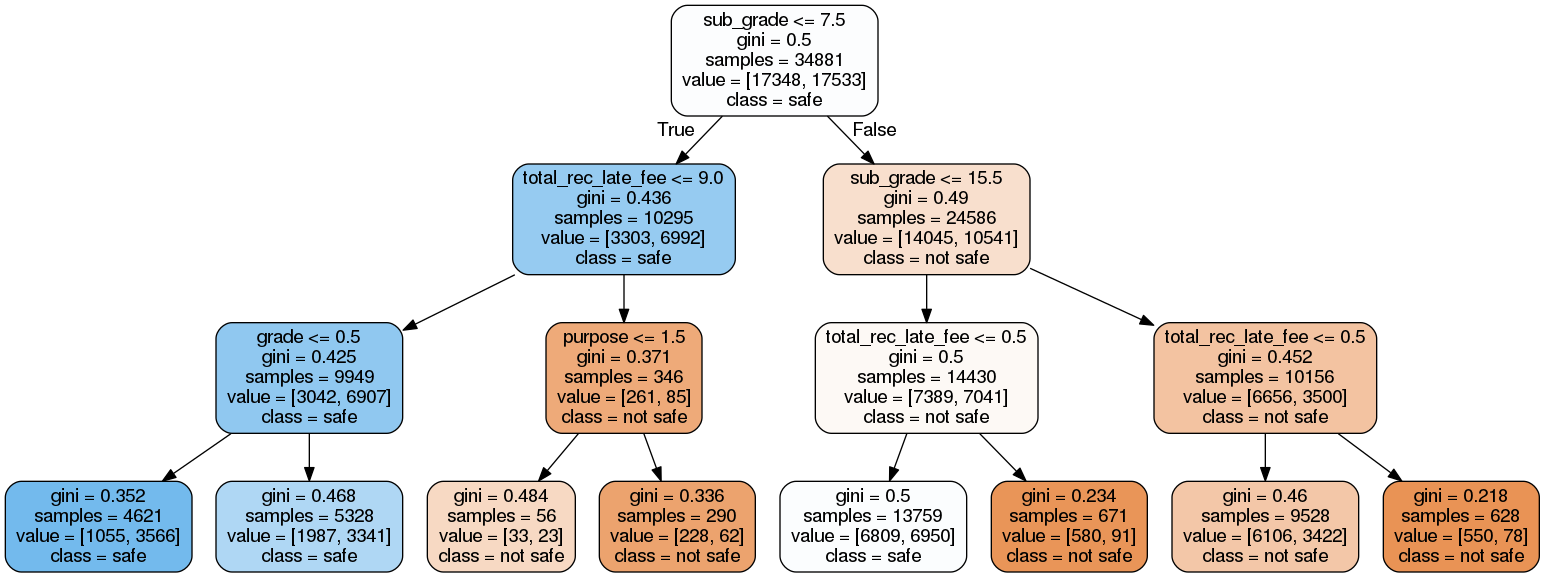

In [20]:
from IPython.display import Image as PImage
from PIL import Image, ImageDraw, ImageFont
img = Image.open("safe-loans.png")
draw = ImageDraw.Draw(img)
img.save('output.png')
PImage("output.png")

In [21]:
test_rec = X_test.iloc[1,:]
clf.predict([test_rec])

array([1])

In [22]:
y_test.iloc[1]

1

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, clf.predict(X_test))

0.6161520598606691